The focus of todays project will be to using the fuzzy package to determine if two strings sound the same pheonetically using NYSIIS name matching.  The NYSIIS algorith  is part of the fuzzy module. It takes a string and outputss the phoentic version of the string. NYSIIS is extremely useful for catching an correctin certain typos, for example mispelled words that sound correct. A basic use of this algorigthm can be seen below. Phoentically `tommorow` and `tomorrow` math even though the former is spelled incorrectly.

In [1]:
# Importing the fuzzy package
import fuzzy

# Exploring the output of fuzzy.nysiis
fuzzy.nysiis('tommorow')

# Testing equivalence of similar sounding words
fuzzy.nysiis('tommorow') == fuzzy.nysiis('tomorrow')

True

Te NY Time puts out a weekly list of bes selling books from a variety of genres. THe focus todau woll be childrens' picture books. We will analyze the gener distribution of authors and look for changes over time. To begin we will import the data and iterate through the dataframe to grab to creat a new column containing just the authors first name.|

In [3]:
# Importing the pandas module
import pandas as pd

# Reading in datasets/nytkids_yearly.csv, which is semicolon delimited.
author_df = pd.read_csv('datasets/nytkids_yearly.csv', delimiter=";")


# Adding first_name as a column to author_df

author_df['first_name'] = author_df['Author'].str.split(' ').str[0]

# Checking out the first few rows of author_df
author_df.head()

,Year,Book Title,Author,Besteller this year,first_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea


Now to get to the phoenics. We will create a new column that contains the phonetic equivalent of every first name extracted. After obtaining the phoentic equivalent we will compare the number of unique values in the first name column to the number of unique values in the phoentic column. 

In [6]:
# Importing numpy
import numpy as np

# Looping through author's first names to create the nysiis (fuzzy) equivalent
nysiis_name = []
# ...YOUR CODE FOR TASK 3...
for name in author_df['first_name']:
    nysiis_name.append(fuzzy.nysiis(name))

# Adding nysiis_name as a column to author_df
author_df['nysiis_name']= nysiis_name

# Printing out the difference between unique firstnames and unique nysiis_names:
print('there are ' +
      str(len(author_df['first_name'].unique())- len(author_df['nysiis_name'].unique() )) +
      ' more first names than pronounciations')

there are 25 more first names than pronounciations


Next we will use `babynames_nysiis.csv`, a dataset derived fromt he Social Secuirty Administration baby name database to identify the author genders. The dataset contains a NYSIIS versions of eahc baby name as well as the %female and %male of the name. We will use the data to creat a list of genders with the assumption that `if % female > % male` we will choose the gender to be female and vice versa. In cases where the percents are equal we will state the gender to be neutral. 

In [7]:
# Reading in datasets/babynames_nysiis.csv, which is semicolon delimited.
babies_df = pd.read_csv('datasets/babynames_nysiis.csv', delimiter=";")
# babies_df.head()

# Looping through babies_df to and filling up gender

conditions = [
    (babies_df['perc_female'] > babies_df['perc_male']),
    (babies_df['perc_female'] < babies_df['perc_male'])]
choices = ['F', 'M']
babies_df['gender'] = np.select(conditions, choices, default='N')


gender = babies_df['gender']

# Printing out the first few rows of babies_df
babies_df.head(10)

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M
5,VALCARY,100.00,0.00,F
6,FRANCASC,63.64,36.36,F
7,CABAT,50.00,50.00,N
8,XANDAR,16.67,83.33,M
9,RACSAN,33.33,66.67,M


In order to assign the gender of each author we will search for each authos phoentic name in the babies_df dataframe & extract the associated gender. TO do this we will create a function that locates the authors name in a list. If the elements is in a list it will return the index if the name is not in the list it willr return a -1. We will use this function when looping through the authors names and setting an index value to hold what the funciton returns. If the index is -1 we will populate 'Unknown' as the gender. Otherwise we will extract the gender in the indexed row.  

In [8]:
# This function returns the location of an element in a_list.
# Where an item does not exist, it returns -1.
def locate_in_list(a_list, element):
    loc_of_name = a_list.index(element) if element in a_list else -1
    return(loc_of_name)

# Looping through author_df['nysiis_name'] and appending the gender of each
# author to author_gender.
author_gender = []
for name in author_df['nysiis_name']:
    index = locate_in_list(list(babies_df['babynysiis']), name)
    if index == -1:
        author_gender.append('Unknown')
    else:
        author_gender.append(babies_df.gender.loc[index])

# Adding author_gender to the author_df
author_df['author_gender'] = author_gender

# Counting the author's genders
author_df['author_gender'].value_counts()

F          395
M          191
Unknown      9
N            8
Name: author_gender, dtype: int64

There are more female sounding named authors in the NYTimes best sellers list for childrens' picture books. Let take a look across the years to see if this trend is solid.

In [9]:
# Creating a list of unique years, sorted in ascending order.
years = list(reversed(author_df.Year.unique()))

# Initializing lists
males_by_yr = []
females_by_yr = []
unknown_by_yr = []


# Looping through years to find the number of male, female and unknown authors per year
# ...YOUR CODE FOR TASK 6...
for year in years:
    males_by_yr.append(len((author_df[
    (author_df['Year']==year) & 
    (author_df['author_gender']=='M')])))
    females_by_yr.append(len((author_df[
    (author_df['Year']==year) & 
    (author_df['author_gender']=='F')])))
    unknown_by_yr.append(len((author_df[
    (author_df['Year']==year) & 
    (author_df['author_gender']=='Unknown')])))

# Printing out yearly values to examine changes over time
data = np.array([males_by_yr, females_by_yr, unknown_by_yr])
headers=['males', 'females', 'unknowns']
pd.DataFrame(data, headers, years)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
males,8,19,27,21,21,11,21,18,25,20
females,15,45,48,51,46,51,34,30,32,43
unknowns,1,3,0,1,0,2,1,0,0,1


Even across years we can see that authors with female sounding names place on the NYTimes best selling list more frequently than male sounding author names. Lets take a moment to visualize the number of names that were not in the SSA dataset and are possibly from foreign authors.

<BarContainer object of 10 artists>

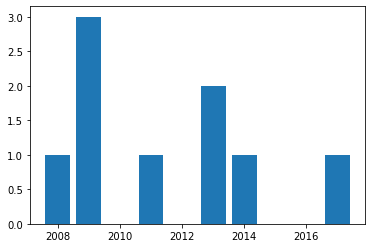

In [10]:
# Importing matplotlib
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

# Plotting the bar chart
plt.bar(years, unknown_by_yr)

# [OPTIONAL] - Setting a title, and axes labels
# ...YOUR CODE FOR TASK 7...

Finally lets conclude by visualizing the trend of female names to male names over the years. 

<BarContainer object of 10 artists>

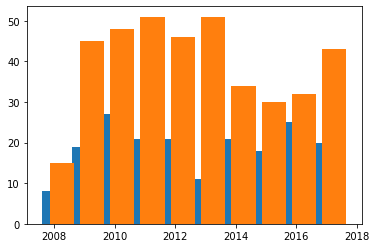

In [11]:
# Creating a new list,  where 0.25 is added to each year
years_shifted = [year + 0.25 for year in years]

# Plotting males_by_yr by year
plt.bar(years, males_by_yr)

# Plotting females_by_yr by years_shifted
plt.bar(years_shifted, females_by_yr)

# [OPTIONAL] - Adding relevant Axes labels and Chart Title
# ... YOUR CODE FOR TASK 8 ...